In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [60]:
N_data_points = 1000

x = linspace(0,1,N_data_points)

y=sin(2.*pi*x)+.5

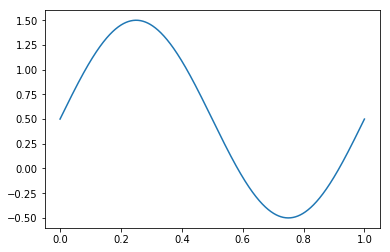

In [61]:
plot(x,y)

In [62]:
degree = 6

basis = zeros((N_data_points,degree+1)) #the rows go over the points, columns are the degree

for d in range(degree+1):
    basis[:,d] = x**d

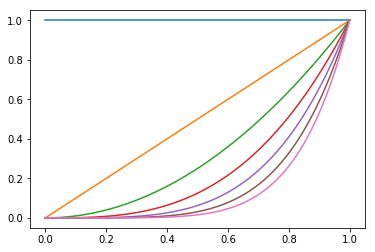

In [63]:
plot(x,basis)

Least square problem: find p in $P^{degree}$, such that $p$ is at "minimum distance from data points"

$p = {{\sum}_{i=0}}^{degree} {basis}_i p_i$
${basis}_i:=x^i$

you are making sure that the sum of the distances squared between your evaluations and the data points is minimum!

Let us call the loss function (error that I am making between my evaluation and the data points):

$\frac{1}{2}{{\sum}_{i=1}}^{N_data_points}{|p(x_i)-y_i|}^2$

The question is: how do we find this polynomial $P$? I can use the unknowns and do:

$\frac{1}{2}{{\sum}_{i=1}}^{N_data_points}|{{\sum}_{j=0}}^{degree}p_j*{basis}_j(x_i)-y_i|^2$

So the loss will be:

$Loss:=\frac{1}{2}{{||\hat{\mathbf{B}}\mathbf{p}-\mathbf{y}||}_{l_2}}^2 = Loss(p)$

which is the norm in $l_2$ (depends on the unknowns $p$).

$B_{ij} = {basis}_j(x_i)$
$p_j = coefficient \; j  \; of \; p(x) \in {\mathbb{P}}^d, j \in[0,d]$
$(Y)_i = y_i$

I want to minimize the loss with respect to its argument $p$.

How do I find $Arg Min(Loss(p))$ =: Least square approx? It is a smooth function in its argument, so we take the derivative of $Loss(p)$ with respect to its arguments and put it to $0$:

$\frac{\partial}{\partial{p_i}}\left[\frac{1}{2}{\sum}_k {|{\sum}_j B_{kj}p_j-y_k|}^2\right]$

Just the case $j=i$ survives out of the derivative, and we get: 

$\frac{\partial}{\partial{p_i}}\left[\frac{1}{2}{\sum}_k {|{\sum}_j B_{kj}p_j-y_k|}^2\right] = B_{ki}$

${\sum}_k\left({\sum}_jB_{kj}p_j-y_k\right)$, which rewriting it becomes: $\frac{\partial{L}}{\partial{p}} = B^{T}Bp - B^{T}y = 0$. To have it equal to zero we must ask: $p = {(B^{T}B)}^{-1}B^{T}y$, where ${(B^{T}B)}^{-1}B^{T}$ is the left-inverse of $B$. If you can solve the equations, then $Y$ is in the space of the images of $\hat{\mathbf{B}}$.

In [64]:
def Loss(p,y):
    return .5*(basis.dot(p)-y).dot(basis.dot(p)-y)/len(y)

In [14]:
dot?

In [65]:
BtB = basis.T.dot(basis)
Bty = basis.T.dot(y)

In [66]:
BtB, Bty

(array([[1000.        ,  500.        ,  333.50016683,  250.25025025,
          200.30033367,  167.00041708,  143.21478621],
        [ 500.        ,  333.50016683,  250.25025025,  200.30033367,
          167.00041708,  143.21478621,  125.37558392],
        [ 333.50016683,  250.25025025,  200.30033367,  167.00041708,
          143.21478621,  125.37558392,  111.50066733],
        [ 250.25025025,  200.30033367,  167.00041708,  143.21478621,
          125.37558392,  111.50066733,  100.40075075],
        [ 200.30033367,  167.00041708,  143.21478621,  125.37558392,
          111.50066733,  100.40075075,   91.31901598],
        [ 167.00041708,  143.21478621,  125.37558392,  111.50066733,
          100.40075075,   91.31901598,   83.75091758],
        [ 143.21478621,  125.37558392,  111.50066733,  100.40075075,
           91.31901598,   83.75091758,   77.34715485]]),
 array([500.        ,  91.00473597,   7.75481939,  -9.70567673,
        -10.51617284,  -7.18870779,  -3.29113869]))

In [67]:
BtB.shape, Bty.shape

((7, 7), (7,))

In [21]:
#In practice, we are writing a machine learning algorithm, deep neural network with 1 layer with 5 nodes!
#What a neural network is doing is trying to find a basis in which our problem can be written in a linear way.

$B^{T}y$ is the projection of $\mathbf{y}$ on such a basis.

In [29]:
One = basis[:,0]

In [30]:
One.T.dot(y) #the average of the sine is 0

500.00000000000034

In [35]:
OneTOne = One.T.dot(One)

In [36]:
OneTOne

1000.0

In [37]:
p = One.T.dot(y)/OneTOne

In [38]:
p

0.5000000000000003

In [68]:
#This would be the least square approximation if you had just polynomials of order 1, which is a constant
#(you take as approximation of sine as its average)

plot(x,One.dot(p))
plot(x,y)

ValueError: shapes (1000,) and (5,) not aligned: 1000 (dim 0) != 5 (dim 0)

In [69]:
p = linalg.solve(BtB,Bty) # it will not invert really the matrix!!
#Instead, it will use some iterative algos (dwhich one epending on the case)

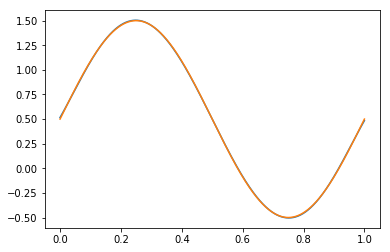

In [70]:
plot(x,basis.dot(p))
plot(x,y)

In [71]:
Loss(p,y) #to make this error better changing the basis
#(as far as the fucntions of my basis and my functions are independent)
#in machine learning normally you choose ReLu functions or sigmoid functions
#Your goal will always be to minimize the Loss!!

#You call it Linear Regression if you have a linear combination of the functions of the basis,
#INDEPENDENTLY of the fact that the functions of the basis are linear or not!!! --> Extreme Learning Machine Method
#Method that requires just the evaluation of one system of equations (no training, etc)

#Machine Learning is a little bit more complicated: you can have: p(x) = {\sum}_{i=0}}^{degree} p_i*{basis}_i(C*x)
#(where C is a constant)

#Loss is good or bad depending on the tolerance

9.362448104579948e-06

What if I define another basis?

$B_{ij} := {basis}_j(x_i)$

and I define the new loss: $ Loss(p) := \frac{1}{2} {{||p-f||}^2}_{L^2} = {{\int}_0}^{1}{(p(x)-f(x))}^2 dx$

And approximating thw integral with the rectangles: $ Loss \approx \frac{1}{2} {{\sum}_{i=1}}^{N} \frac{1}{N}{|p(x_i)-y_i|}^2$, which is exactly the loss function that we defined before!